#Plotting sigmoid 2D

In [0]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(w,x,b):
  return (1/(1+np.exp(-(w*x+b))))

add form field to get slider

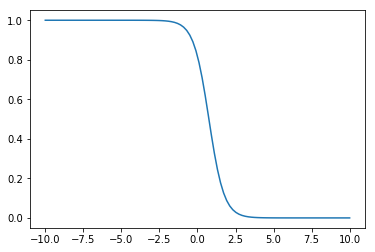

In [11]:
w = -2 #@param {type:"slider", min:-2, max:2, step:1}
b=1.5  #@param {type:"slider", min:-2, max:2, step:0.1}
x=np.linspace(-10,10,100) #range of x if rom -10 to 10 and equally spaced divisions are 100.
y=sigmoid(x,w,b)
plt.plot(x,y)
plt.show()

#Plotting sigmoid 3D

$S_{w1,w2}(x_1,x_2)=\frac{1}{1+e^{-(w1x_1+ w2 x_2+ b)}}$

In [0]:
def sigmoid_3d(x1,x2,w1,w2,b):
  return(1/(1+np.exp(-(w1 * x1 + w2 * x2 + b))))  #if a () is not placed around denominator, sigmoid is giving a value higher than one which is absurd.Please take care..

In [0]:
from mpl_toolkits import mplot3d

In [92]:
x1= np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)

X1,X2= np.meshgrid(x1,x2) #to create a grid

print(x1.shape,x2.shape,X1.shape,X2.shape)  #just to see 1D or 2D..

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1=0.5
w2=0.5
b=0
Y=sigmoid_3d(X1,X2,w1,w2,b)

In [41]:
a=sigmoid_3d(10,10,0.5,0.5,0)
print(a)

0.9999546021312976


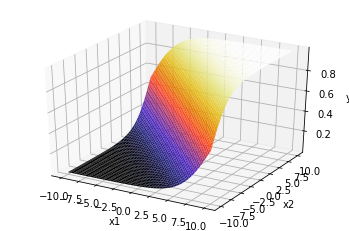

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='CMRmap')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

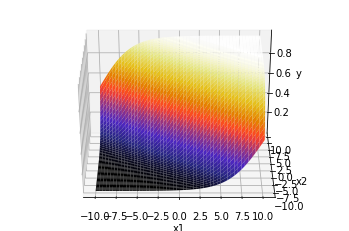

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='CMRmap')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');   

ax.view_init(30,270)      #height,rotation of plot



*   Here for a particular x1 we can see the variation of y with x2(colour).
*   Try for 30,180 etc combinations also and see the variation.
*   Also change the values of w1 and w2 and see the variation. If w1>>w2, you can see that the plot is same across various values of x2.




#Compute Loss For A Given Dataset

For now the parameters will be found using brute force search. Gradient descent will be used in subsequent codes.

In [0]:
w_unknown=0.5
b_unknown=0.25


X= np.random.random(25)*20 - 10      #random(5) gives 5 no.s between -1 to 1. Hence for getting values b|w -10,10 multiply it by 20 and subtract by 10
Y= sigmoid(X,w_unknown,b_unknown)

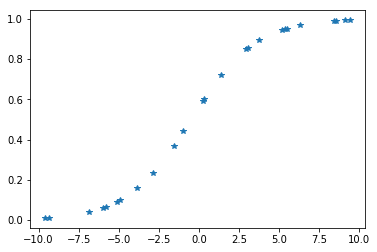

In [51]:
plt.plot(X,Y,'*')   #scatter plot is used because random lines won't give any sense here.Just try to remove '*' and plot the graph..
plt.show()

Function to calculate loss

In [0]:
def calculate_loss(X,Y,w_est,b_est):   #est- estimated
  loss= 0
   # for brute search:
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2   # square loss: (actual-predicted)^2
  return loss
  

Take various values of w and b and calculate the losses to get required values.

In [0]:
#create mesh of w and b
w= np.linspace(-1,1,100)  #range has been taken for some reason..
b= np.linspace(-1,1,100)

W,B=np.meshgrid(w,b)

Loss=np.zeros(W.shape) #because loss function should be a numpy array of same size as W hence an array of 0's have been created



In [0]:
#to iterate over the rane of W (just like matrix is printed in C)

for i in range(W.shape[0]):
  for j in range(W.shape[1]):
    Loss[i,j]=calculate_loss(X,Y,W[i,j],B[i,j])
    

Let's plot a graph - w,b,loss

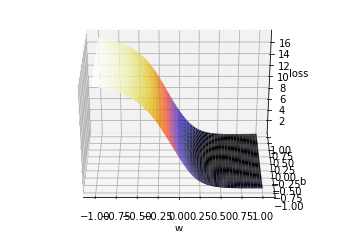

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, Loss, cmap='CMRmap')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');   

ax.view_init(30,270) 

Studying the plot shows that for -ve values of w loss is very high so let's change the value of w from -1,1 to 0,2.

In [0]:
#create mesh of w and b
w= np.linspace(0,3,100)  #range has been taken for some reason..
b= np.linspace(-1,1,100)

W,B=np.meshgrid(w,b)

Loss=np.zeros(W.shape) #because loss function should be a numpy array of same size as W hence an array of 0's have been created



after running the above code , run iteration code too..

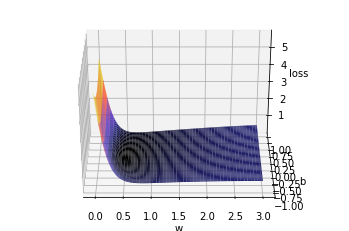

In [78]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, Loss, cmap='CMRmap')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');   

ax.view_init(30,270) 

This plot shows that somewhere around 0.5=w it shows less error and this is nearer to w_unknown..

In [79]:
np.argmin(Loss) #will tell the minimum  value of  loss 

6217

In [0]:
#to find the coordinates of that particular loss:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])   #values of coordinates can't be floating numbers
  

In [83]:
print(i,j)

62 17


In [85]:
print(W[i,j],B[i,j])

0.5151515151515151 0.2525252525252526


The w_unknown and b_unknown which we have chosen are quite closer to the parameters we have got by plotting loss plot and finding the parameters for which the loss is minimum.

#Contour Plot

In [93]:
x1= np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)

X1,X2= np.meshgrid(x1,x2) #to create a grid

print(x1.shape,x2.shape,X1.shape,X2.shape)  #just to see 1D or 2D..

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1=0.5
w2=0.5
b=0
Y=sigmoid_3d(X1,X2,w1,w2,b)

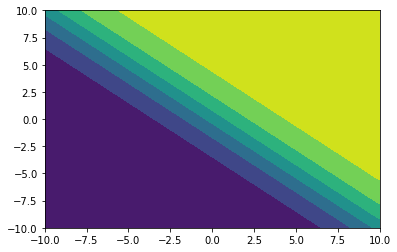

In [95]:
plt.contourf(X1,X2,Y)
plt.show()

Here, instead of showing Y as z axis, colour variation shows the  variation of value of Y.

In [0]:
import matplotlib.colors

In [0]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["black","red","white"])

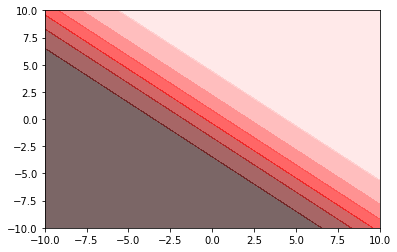

In [99]:
plt.contourf(X1,X2,Y,cmap=my_cmap,alpha=0.6)
plt.show()

#Class For Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w=None
    self.b=None
    
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x)) #s(w,b) is actually surpassing perceptron into sigmoid..
  
  def grad_w(self,x,y):    #gradient algo
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y) * y_pred * (1-y_pred) * x
  
  def grad_b(self,x,y):                          #gradient algo
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y) * y_pred * (1-y_pred) 
  
  def fit(self,X,Y,epochs=1, learning_rate=1,initialise=True):
    
    #initialise w, b
    if initialise :
      self.w=np.random.randn(1,X.shape[1])  #since X is vector, no. of columns of that = no. of w (see theory)
      self.b=0
    
    for i in range(epochs):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
        
      self.w-= learning_rate * dw
      self.b-=learning_rate * db
      
      
    
    
  
    
    
    

#Fit for Toy Data

In [0]:
x=np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
y=[1,1,1,0,0,0]

In [0]:
sn= SigmoidNeuron()
sn.fit(x,y,1,0.25,True)

In [126]:
sn.fit(x,y,1,0.25,True)
for i in range(10):
  print(sn.w,sn.b)
  sn.fit(x,y,1,0.25,False)

[[-0.02838699  2.44905507]] [0.00276398]
[[5.72525992e-04 2.41978711e+00]] [0.00726766]
[[0.03858336 2.38925042]] [0.01416115]
[[0.08906112 2.35703044]] [0.02435407]
[[0.1567065  2.32247143]] [0.03908775]
[[0.24726497 2.28469226]] [0.05986996]
[[0.36453096 2.24321186]] [0.08771121]
[[0.49950839 2.20041416]] [0.12038526]
[[0.62031324 2.16378991]] [0.1498693]
[[0.70508364 2.13782512]] [0.17058038]


Changing 0.25 to 0.5 or 10 to 20 etc, we can't actually get much info. So plotting would be of great help now.

In [0]:
def plot_sn(x,y,sn):
  x1= np.linspace(-10,10,100)
  x2=np.linspace(-10,10,100)

  X1,X2= np.meshgrid(x1,x2)
  Y=np.zeros(X1.shape)
  
  for i in range(x2.size):
    for j in range(x1.size):
      val = np.asarray([x1[j],x2[i]])
      Y[i,j]=sn.sigmoid(sn.perceptron)
  plt.contourf(X1,X2,Y,cmap= my_cmp,alpha=0.6)
  plt.scatter(x[:,0],x[:,1],c=Y)
      



In [128]:
sn.fit(x,y,1,0.5,True)
for i in range(20):
  print(sn.w,sn.b)
  plot_sn(x,y,sn)
  sn.fit(x,y,1,0.5,False)

[[ 0.2506636  -0.69070085]] [-0.09846333]


TypeError: ignored